In [215]:
import torch
from torch import nn

In [216]:
x=torch.randn(100,3)
layer=nn.Linear(3,5)
print(layer(x).shape)
print(layer.weight)
print(layer.bias)

torch.Size([100, 5])
Parameter containing:
tensor([[-0.4968, -0.4503, -0.3033],
        [ 0.1387, -0.4343,  0.2180],
        [ 0.4207,  0.1907, -0.1147],
        [ 0.3775, -0.1175, -0.3767],
        [-0.5507,  0.5762, -0.3849]], requires_grad=True)
Parameter containing:
tensor([-0.1050,  0.3734,  0.0172,  0.2085,  0.1244], requires_grad=True)


In [217]:
x=torch.randn(2,5)
layer=nn.ReLU()
print(x)
print(layer(x))

tensor([[-1.6262,  1.6794,  0.2193, -0.0619, -0.5939],
        [ 1.5631,  1.7275,  0.1357,  0.5959,  1.3217]])
tensor([[0.0000, 1.6794, 0.2193, 0.0000, 0.0000],
        [1.5631, 1.7275, 0.1357, 0.5959, 1.3217]])


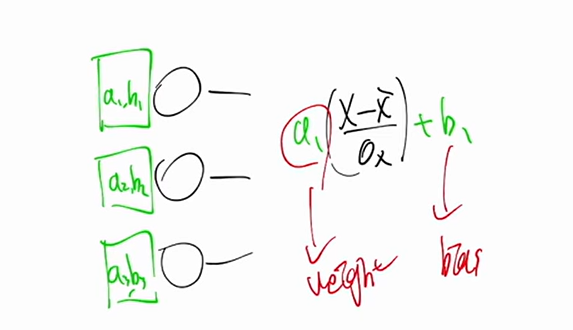

In [218]:
import torch
from torch import nn

"""
BatchNorm1d는 랜덤 초기화를 하지 않음
weight은 1, bias는 0으로 초기화됨
이는 처음에는 정규화된 입력(평균 0, 분산 1)을 그대로 출력하도록 설정한다는 의미
즉, γ = 1, β = 0 상태로 시작 (γ는 scale, β는 shift 역할)
→ 여기서 '스케일(scale)'은 값을 얼마나 크게 또는 작게 만드는지를 뜻하며,
   입력값에 곱하는 배율을 의미
   예를 들어, 스케일이 2면 입력값이 2배 커지고, 0.5면 절반으로 줄어듬
→ '쉬프트(shift)'는 값을 얼마만큼 위아래로 이동시키는 것을 의미하며,
   입력값에 더하는 상수 값을 뜻함
   예를 들어, 쉬프트가 3이면 모든 값이 3만큼 더 커지고, -1이면 1만큼 내려감
정규화 후 → γ와 β로 재배치 (affine transform)
학습을 통해 γ(a)와 β(b)를 조금씩 조절하면서
"어떻게 재배치해야 모델의 Loss가 더 잘 줄어드는가?"를 찾아나감
"""
layer = nn.BatchNorm1d(3)  # 입력 차원(feature 수)이 3일 때

print(layer.weight) # → 초기값은 모두 1
print(layer.bias) # → 초기값은 모두 0

"""
참고:
BatchNorm의 전체 계산:
  x_hat = (x - mean) / sqrt(var + ε)
  y = γ * x_hat + β
여기서 γ와 β는 학습 가능한 파라미터이며,
초기에는 γ=1, β=0 → 즉 x_hat 그대로 출력됨
"""

x = torch.randn(5,3) # (batch_size, feature 수)
print(x)
print(layer(x))

Parameter containing:
tensor([1., 1., 1.], requires_grad=True)
Parameter containing:
tensor([0., 0., 0.], requires_grad=True)
tensor([[ 1.9637,  0.7885, -0.8834],
        [-0.1335,  1.2665,  2.3325],
        [ 1.1834, -0.9679,  0.1710],
        [ 2.2545,  0.6482, -1.3299],
        [-0.1874,  0.2554, -0.7294]])
tensor([[ 0.9265,  0.5166, -0.6097],
        [-1.1241,  1.1490,  1.8550],
        [ 0.1636, -1.8077,  0.1984],
        [ 1.2109,  0.3309, -0.9519],
        [-1.1768, -0.1888, -0.4917]], grad_fn=<NativeBatchNormBackward0>)


In [219]:
layer=nn.LayerNorm(3)
print(layer.weight)
print(layer.bias)

x = torch.randn(5,3)
print(x)
print(layer(x))

Parameter containing:
tensor([1., 1., 1.], requires_grad=True)
Parameter containing:
tensor([0., 0., 0.], requires_grad=True)
tensor([[-0.3833, -0.0986, -0.8371],
        [-0.3561,  0.1623, -0.9145],
        [-0.2218, -0.0373,  0.2473],
        [ 1.2860,  2.0254, -1.9470],
        [-0.3563,  1.0557,  1.2620]])
tensor([[ 0.1853,  1.1215, -1.3068],
        [ 0.0303,  1.2093, -1.2396],
        [-1.1288, -0.1732,  1.3019],
        [ 0.4819,  0.9105, -1.3924],
        [-1.4045,  0.5588,  0.8457]], grad_fn=<NativeLayerNormBackward0>)


In [220]:
layer = nn.BatchNorm2d(3)
print(layer.weight)
print(layer.bias)

x = torch.randn(5,3,32,32)
print(layer(x).shape)

Parameter containing:
tensor([1., 1., 1.], requires_grad=True)
Parameter containing:
tensor([0., 0., 0.], requires_grad=True)
torch.Size([5, 3, 32, 32])


In [221]:
"""
Dropout에서 왜 1 / (1 - p)를 곱하는가?

문제: 뉴런을 일부 끄면 출력의 기대값이 줄어듦
예를 들어, 어떤 뉴런의 출력이 항상 1.0일 때 Dropout(p=0.5)을 적용하면:

- 50% 확률로 출력 = 1.0
- 50% 확률로 출력 = 0.0

평균(기대값)은:
E[x_drop] = 0.5 × 1.0 + 0.5 × 0.0 = 0.5
→ 출력이 절반으로 줄어들어 학습이 불안정해질 수 있음

해결책: 살아남은 뉴런에 1 / (1 - p)를 곱해줌
예: p = 0.5 → 살릴 확률 = 1 - p = 0.5
→ 살아남은 뉴런에 1 / 0.5 = 2.0을 곱하면:

- 50% 확률로 출력 = 1.0 × 2.0 = 2.0
- 50% 확률로 출력 = 0.0

평균(기대값)은:
E[x_scaled] = 0.5 × 2.0 + 0.5 × 0.0 = 1.0
→ 원래 출력의 평균을 유지할 수 있음

이것이 바로 Inverted Dropout
- PyTorch는 훈련 중에 자동으로 1 / (1 - p) 스케일링을 적용해줌
- 따라서 사용자가 따로 곱해줄 필요 없음
- 평가(eval) 모드에서는 Dropout 없이 그대로 출력되며, 기대값도 유지됨
"""

import torch
import torch.nn as nn

x = torch.randn(3, 7)
print("입력 텐서 x:\n", x)

# 논문에서는 p를 '살릴 확률'로 설명하지만, PyTorch에서는 '죽일 확률'로 정의함
drop = nn.Dropout(p=0.1)  # 10% 뉴런 끄기

# 학습 모드일 때는 무작위로 뉴런을 끄고,
# 살아남은 뉴런에는 1 / (1 - p) 배를 곱해서 전체 평균 출력을 보정
print("학습 모드에서 Dropout 적용 후 결과:\n", drop(x))  # 내부적으로 살아남은 뉴런 * (1 / 0.9) 수행됨

drop.eval()  # 평가 모드에서는 Dropout 미적용
print("평가 모드에서 Dropout 미적용 결과:\n", drop(x))

print(x[0][0])
print(x[0][0]*1.111)
print(drop(x)[0][0])


입력 텐서 x:
 tensor([[ 1.5057e+00,  1.3926e-01, -1.5129e+00,  2.1109e+00, -1.3020e+00,
          1.2908e-01, -1.7629e-01],
        [-4.7936e-02,  1.0161e+00,  3.1121e-01,  4.3612e-02,  2.7661e+00,
         -1.4585e+00, -1.9265e-01],
        [ 4.9612e-01,  6.7376e-01, -1.9940e-01, -5.8374e-04,  3.2704e-01,
          9.3435e-01,  6.6486e-01]])
학습 모드에서 Dropout 적용 후 결과:
 tensor([[ 1.6730e+00,  0.0000e+00, -1.6810e+00,  2.3454e+00, -1.4466e+00,
          1.4342e-01, -1.9588e-01],
        [-5.3262e-02,  1.1290e+00,  3.4579e-01,  0.0000e+00,  3.0734e+00,
         -1.6206e+00, -2.1405e-01],
        [ 5.5125e-01,  7.4862e-01, -2.2156e-01, -6.4860e-04,  0.0000e+00,
          1.0382e+00,  7.3873e-01]])
평가 모드에서 Dropout 미적용 결과:
 tensor([[ 1.5057e+00,  1.3926e-01, -1.5129e+00,  2.1109e+00, -1.3020e+00,
          1.2908e-01, -1.7629e-01],
        [-4.7936e-02,  1.0161e+00,  3.1121e-01,  4.3612e-02,  2.7661e+00,
         -1.4585e+00, -1.9265e-01],
        [ 4.9612e-01,  6.7376e-01, -1.9940e-01, -5.8374e-

In [222]:
class sample_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.drop_layer = nn.Sequential(
            nn.Linear(5,7),
            nn.ReLU(),
            nn.Dropout(p=0.3) # (3, 7) 텐서의 각 원소별로 30% 확률로 꺼짐
        )

    def forward(self, x):
        x = self.drop_layer(x)
        return x

model = sample_model()
model.train() # train mode로 전환
# x=torch.randn(3,5) # 그 담에 x=torch.randn(2,3,5)
x=torch.randn(2,3,5)
print(model(x).shape)
print()

model.eval()
print(model(x)) # test mode

torch.Size([2, 3, 7])

tensor([[[0.0352, 0.4559, 0.0000, 0.0000, 0.0000, 0.1111, 0.0000],
         [0.0000, 0.4645, 0.0000, 0.0000, 0.0000, 0.6081, 0.0000],
         [0.0000, 0.0000, 0.2290, 0.1347, 0.0000, 0.0000, 0.0000]],

        [[0.3840, 0.4287, 0.4368, 0.3745, 0.0000, 0.3228, 0.0000],
         [0.3015, 0.0000, 0.0000, 0.0000, 0.3181, 0.0000, 0.0000],
         [0.1329, 0.3189, 0.0000, 0.1946, 0.0000, 0.0000, 0.7807]]],
       grad_fn=<ReluBackward0>)


In [223]:
# 채널 1인 이미지를 입력 받고, 필터 2개를 사용해서 특징맵을 2개를 얻겠다 그리고 3X3만큼의 영역을 보겠다 라는 뜻
layer = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3) # stride=1, padding=0 이 디폴트
layer(torch.randn(32,1,5,5)).shape
# nn.Linear(3,5) # 채채 # 근데 얘는 채 또는 개채를 원함, 개x3 => 개x5
# nn.Conv2d(3,5) # 채채 # 근데 얘는 채행열 또는 개채행열을 원함, 개x3x행x열 => 개x5x행x열

torch.Size([32, 2, 3, 3])

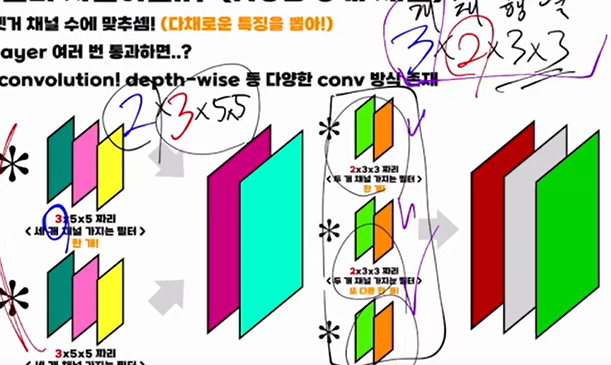

In [224]:
# nn.Conv2d(입력 채널 수, 필터 수, 커널의 (높이, 너비))
layer = nn.Conv2d(3,5,3) # weight(=필터=커널)가 3x3x3 짜리 5개 존재 (5x3x3x3)
# layer = nn.Conv2d(3,5,3,stride=2,padding=1)
print(layer.weight.shape) # torch.Size([5, 3, 3, 3]): 개채행열 -> 5개의 필터, 3개의 입력 채널, 3행, 3열
print(layer(torch.randn(32,3,5,5)).shape) # 개채행열

torch.Size([5, 3, 3, 3])
torch.Size([32, 5, 3, 3])


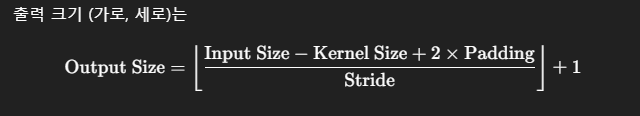

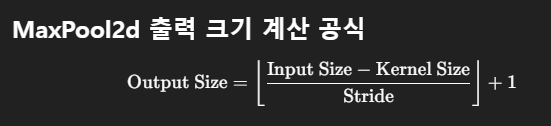

In [225]:
conv1 = nn.Conv2d(1,8,6,stride=2)
x=torch.randn(32,1,28,28)
# (28-6+2*0)/2 + 1
print(conv1(x).shape) # 32,8,12,12

conv2 = nn.Conv2d(8,16,3,padding=1)
# (12-3+2*1)/1 + 1
print(conv2(conv1(x)).shape) #  32, 16, 12, 12

Maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
# (12 - 2)/2 + 1
print(Maxpool(conv2(conv1(x))).shape) # 32, 16, 6, 6

torch.Size([32, 8, 12, 12])
torch.Size([32, 16, 12, 12])
torch.Size([32, 16, 6, 6])


In [226]:
maxpool=nn.MaxPool2d(2) # 2 로만 줘도 자동 kernel_size=2, stride=2
x=torch.randn(1,6,6)
print(x)
print(maxpool(x).shape)
print(maxpool(torch.randn(32,3,6,6)).shape)

tensor([[[-0.2322,  1.3705, -1.5046,  0.6727,  0.3626,  2.4061],
         [-0.4218,  0.3766,  1.5932,  1.3729,  0.7690,  0.6434],
         [ 1.0967,  0.7618, -0.1802,  1.5903,  1.1521, -0.4929],
         [ 0.6285, -0.7417, -0.9373, -1.4175,  1.3294, -0.3442],
         [-0.4511, -0.8697,  1.0504,  1.2505, -0.4217, -0.6517],
         [ 0.1894,  0.5703, -0.2927,  1.3127, -1.1212, -0.3824]]])
torch.Size([1, 3, 3])
torch.Size([32, 3, 3, 3])


In [227]:
maxpool=nn.AvgPool2d(2)
x=torch.randn(1,6,6)
print(x)
# kernel_size=2, stride=2 에 대해서 평균
print(x[0][0:2,0:2].mean())
print(x[0][0:2,2:4].mean())
print()
print(maxpool(x))
print(maxpool(torch.randn(32,3,6,6)).shape)

tensor([[[-0.5223, -1.8366, -1.0800,  0.0997, -0.7755, -0.7639],
         [ 0.9911, -0.7268, -1.5754,  0.2909,  1.2479,  0.6812],
         [-0.3896, -0.0514,  0.9498,  2.8900, -0.2467,  0.5896],
         [-0.6265,  0.0670,  1.7285, -0.0066,  1.5548, -0.0601],
         [ 1.3012,  0.1623,  1.3740, -0.7099,  0.4982, -0.3861],
         [ 0.5682, -0.5278, -0.1242,  2.3087, -1.1652, -0.7244]]])
tensor(-0.5237)
tensor(-0.5662)

tensor([[[-0.5237, -0.5662,  0.0974],
         [-0.2501,  1.3904,  0.4594],
         [ 0.3760,  0.7122, -0.4444]]])
torch.Size([32, 3, 3, 3])


In [228]:
x=torch.randn(32,1,28,28)
conv1 = nn.Conv2d(1,8,6,stride=2)
conv2 = nn.Conv2d(8,16,3,padding=1)
Maxpool = nn.MaxPool2d(2)
print(Maxpool(conv2(conv1(x))).shape)

torch.Size([32, 16, 6, 6])


In [289]:
# class CNN(nn.Module):
#     def __init__(self):
#         super().__init__()

#         self.conv1 = nn.Conv2d(1,8,6,stride=2)
#         self.conv2 = nn.Conv2d(8,16,3,padding=1)
#         self.Maxpool = nn.MaxPool2d(2)
#         self.fc = nn.Linear(16*6*6, 10)


#     def forward(self, x):
#         # print(x.shape)
#         x = self.conv1(x)
#         # print(x.shape)
#         x = self.conv2(x)
#         # print(x.shape)
#         x = self.Maxpool(x)
#         # print(x.shape)
#         x = torch.flatten(x, start_dim=1)
#         # print(x.shape)
#         x = self.fc(x)
#         # print(x.shape)
#         return x


class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 8, 3, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU()
        )
        self.Maxpool1 = nn.MaxPool2d(2)

        self.conv2 = nn.Sequential(
            nn.Conv2d(8, 16, 3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU()
        )
        self.Maxpool2 = nn.MaxPool2d(2)

        self.conv3 = nn.Sequential(
            nn.Conv2d(16,32,3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )
        self.Maxpool3 = nn.MaxPool2d(2)
        self.fc = nn.Linear(32*3*3, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.Maxpool1(x)
        x = self.conv2(x)
        x = self.Maxpool2(x)
        x = self.conv3(x)
        x = self.Maxpool3(x) # x.shape: [32, 32, 4, 4]
        # print(x.shape)  # 중간 텐서 shape 출력해보기
        x = torch.flatten(x, start_dim=1)
        # print(x.shape)  # 중간 텐서 shape 출력해보기
        x = self.fc(x)
        return x


class CNN_deep(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(1,32,3,padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32,32,3,padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )
        self.Maxpool1 = nn.MaxPool2d(2)

        self.conv_block2 = nn.Sequential(
            nn.Conv2d(32,64,3,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64,64,3,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64,64,3,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.Maxpool2 = nn.MaxPool2d(2)

        self.conv_block3 = nn.Sequential(
            nn.Conv2d(64,128,3,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128,128,3,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128,128,3,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.Maxpool3 = nn.MaxPool2d(2)

        self.classifier = nn.Sequential(
            nn.Linear(128*3*3, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.Maxpool1(x)
        x = self.conv_block2(x)
        x = self.Maxpool2(x)
        x = self.conv_block3(x)
        x = self.Maxpool3(x)
        print(x.shape)
        x = torch.flatten(x, start_dim=1)
        print(x.shape)
        x = self.classifier(x)
        print(x.shape)
        return x

In [290]:
x=torch.randn(32,1,28,28)
model = CNN_deep()
print(model(x).shape)

torch.Size([32, 128, 3, 3])
torch.Size([32, 1152])
torch.Size([32, 10])
torch.Size([32, 10])
